In [8]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
import torch

In [9]:
# Set random seeds for reproducibility
seed = 0

torch.manual_seed(seed)
np.random.seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(42)
torch.backends.cudnn.deterministic = True

In [10]:
# Set up paths according to your directory structure
dataDir = 'data'
dataType = 'val2017'
annFile = f'{dataDir}/annotations/trainval2017/captions_{dataType}.json'
instanceAnnFile = f'{dataDir}/annotations/trainval2017/instances_{dataType}.json'

# Initialize COCO API for captions
coco_caps = COCO(annFile)
# Initialize COCO API for instances
coco = COCO(instanceAnnFile)

def display_image_with_captions(img_id=None):
    """
    Display an image with its captions.
    If no img_id is provided, selects a random image.
    """
    if img_id is None:
        # Get random image ID
        img_ids = list(coco.imgs.keys())
        img_id = random.choice(img_ids)
        print(f"Randomly selected image ID: {img_id}")
    
    # Load image info
    img_info = coco.loadImgs([img_id])[0]
    
    # Load image
    img_path = f"{dataDir}/images/{dataType}/{img_info['file_name']}"
    I = io.imread(img_path)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
    
    # Display image
    ax1.imshow(I)
    ax1.axis('off')
    ax1.set_title('Image')
    
    # Get and display captions
    ann_ids = coco_caps.getAnnIds(imgIds=img_id)
    anns = coco_caps.loadAnns(ann_ids)
    
    # Create text display for captions
    caption_text = '\n\n'.join([f"Caption {i+1}: {ann['caption']}" 
                               for i, ann in enumerate(anns)])
    ax2.text(0.1, 0.5, caption_text, 
             wrap=True, 
             verticalalignment='center',
             fontsize=12)
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return img_id

# Function to display multiple random images with captions
def display_multiple_images(num_images=3):
    """
    Display multiple random images with their captions
    """
    for _ in range(num_images):
        print("-" * 80)
        img_id = display_image_with_captions()
        print(f"Image ID: {img_id}")
        print("-" * 80)
        print("\n")

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.54s)
creating index...
index created!


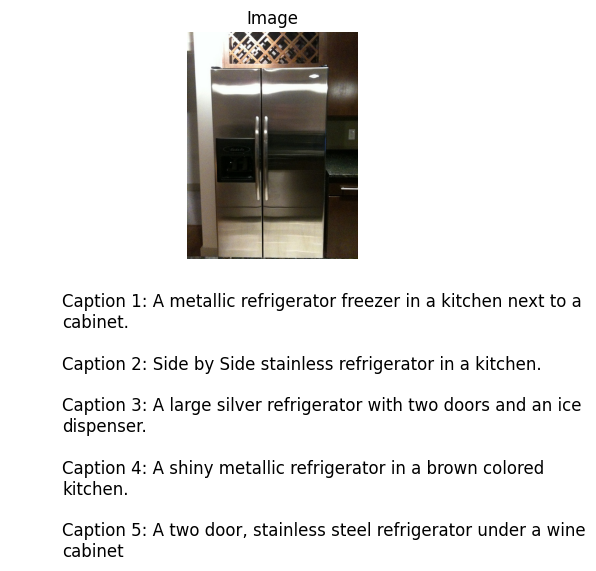

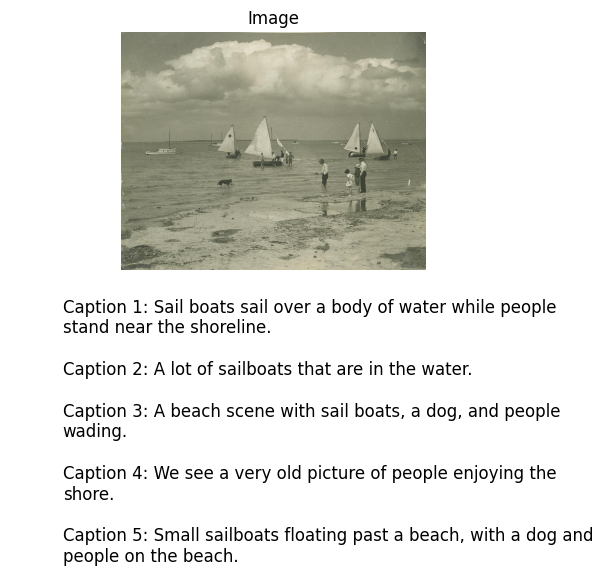

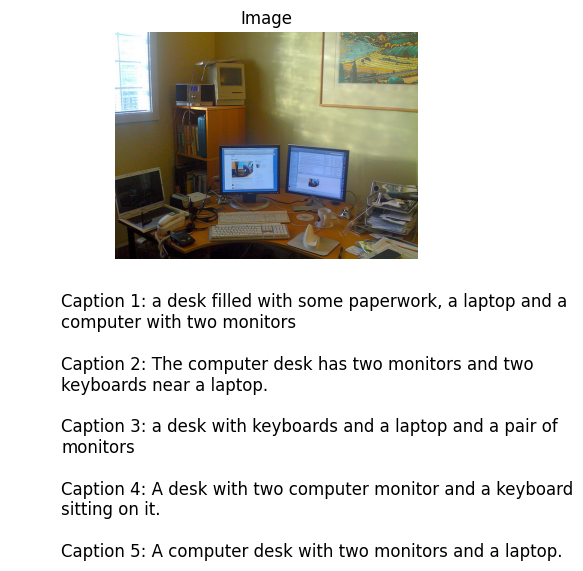

255165

In [14]:
# To display a specific image, use:
# display_image_with_captions(img_id=YOUR_IMAGE_ID)
display_image_with_captions(502732)
display_image_with_captions(78565)
display_image_with_captions(255165)


--------------------------------------------------------------------------------
Randomly selected image ID: 138954


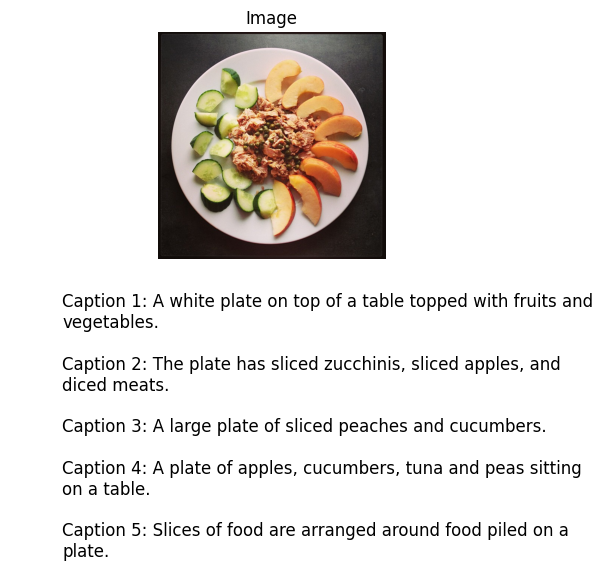

Image ID: 138954
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Randomly selected image ID: 529528


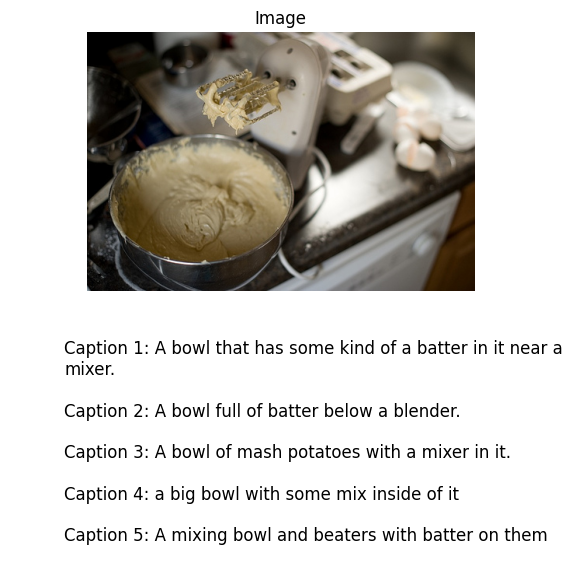

Image ID: 529528
--------------------------------------------------------------------------------


--------------------------------------------------------------------------------
Randomly selected image ID: 312278


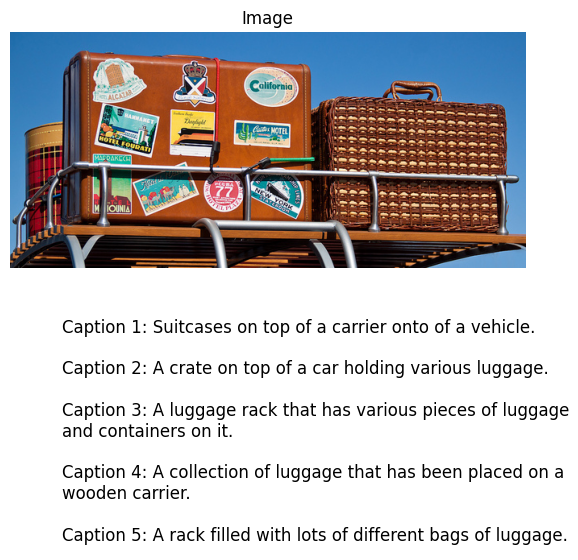

Image ID: 312278
--------------------------------------------------------------------------------




In [12]:
# Example usage:
# Display 3 random images with their captions
display_multiple_images(3)